# Bank Marketing Data Set
http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from autogluon.tabular import TabularDataset, TabularPredictor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit

import os

model_save_path = os.path.join(os.environ['HOME'], 'autogluon_models', 'bank_marketing_data')

## Data ingestion

In [3]:
bank_marketing_data = pd.read_csv('../../data/bank-marketing/bank-additional-full.csv', sep=';')
print(bank_marketing_data.shape)
bank_marketing_data.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
label = 'y'
bank_marketing_data[label].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [6]:
bank_marketing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Data analysis

In [13]:
#split data
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.12, random_state=21)
test_df = train_df = None
for train_idx, test_idx in strat_split.split(bank_marketing_data, bank_marketing_data[label]):
    test_df = bank_marketing_data.loc[test_idx]
    train_df = bank_marketing_data.loc[train_idx]

In [14]:
# check for na or nulls
train_df.isna().sum() # no null

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
# whats up with pdays
train_df['pdays'].value_counts() # 999 is suspect

999    34917
3        393
6        355
4        105
9         58
12        55
7         53
2         51
10        46
5         40
13        30
11        25
1         24
15        20
14        16
8         14
0         11
16        10
17         8
18         5
19         3
22         3
27         1
21         1
26         1
Name: pdays, dtype: int64

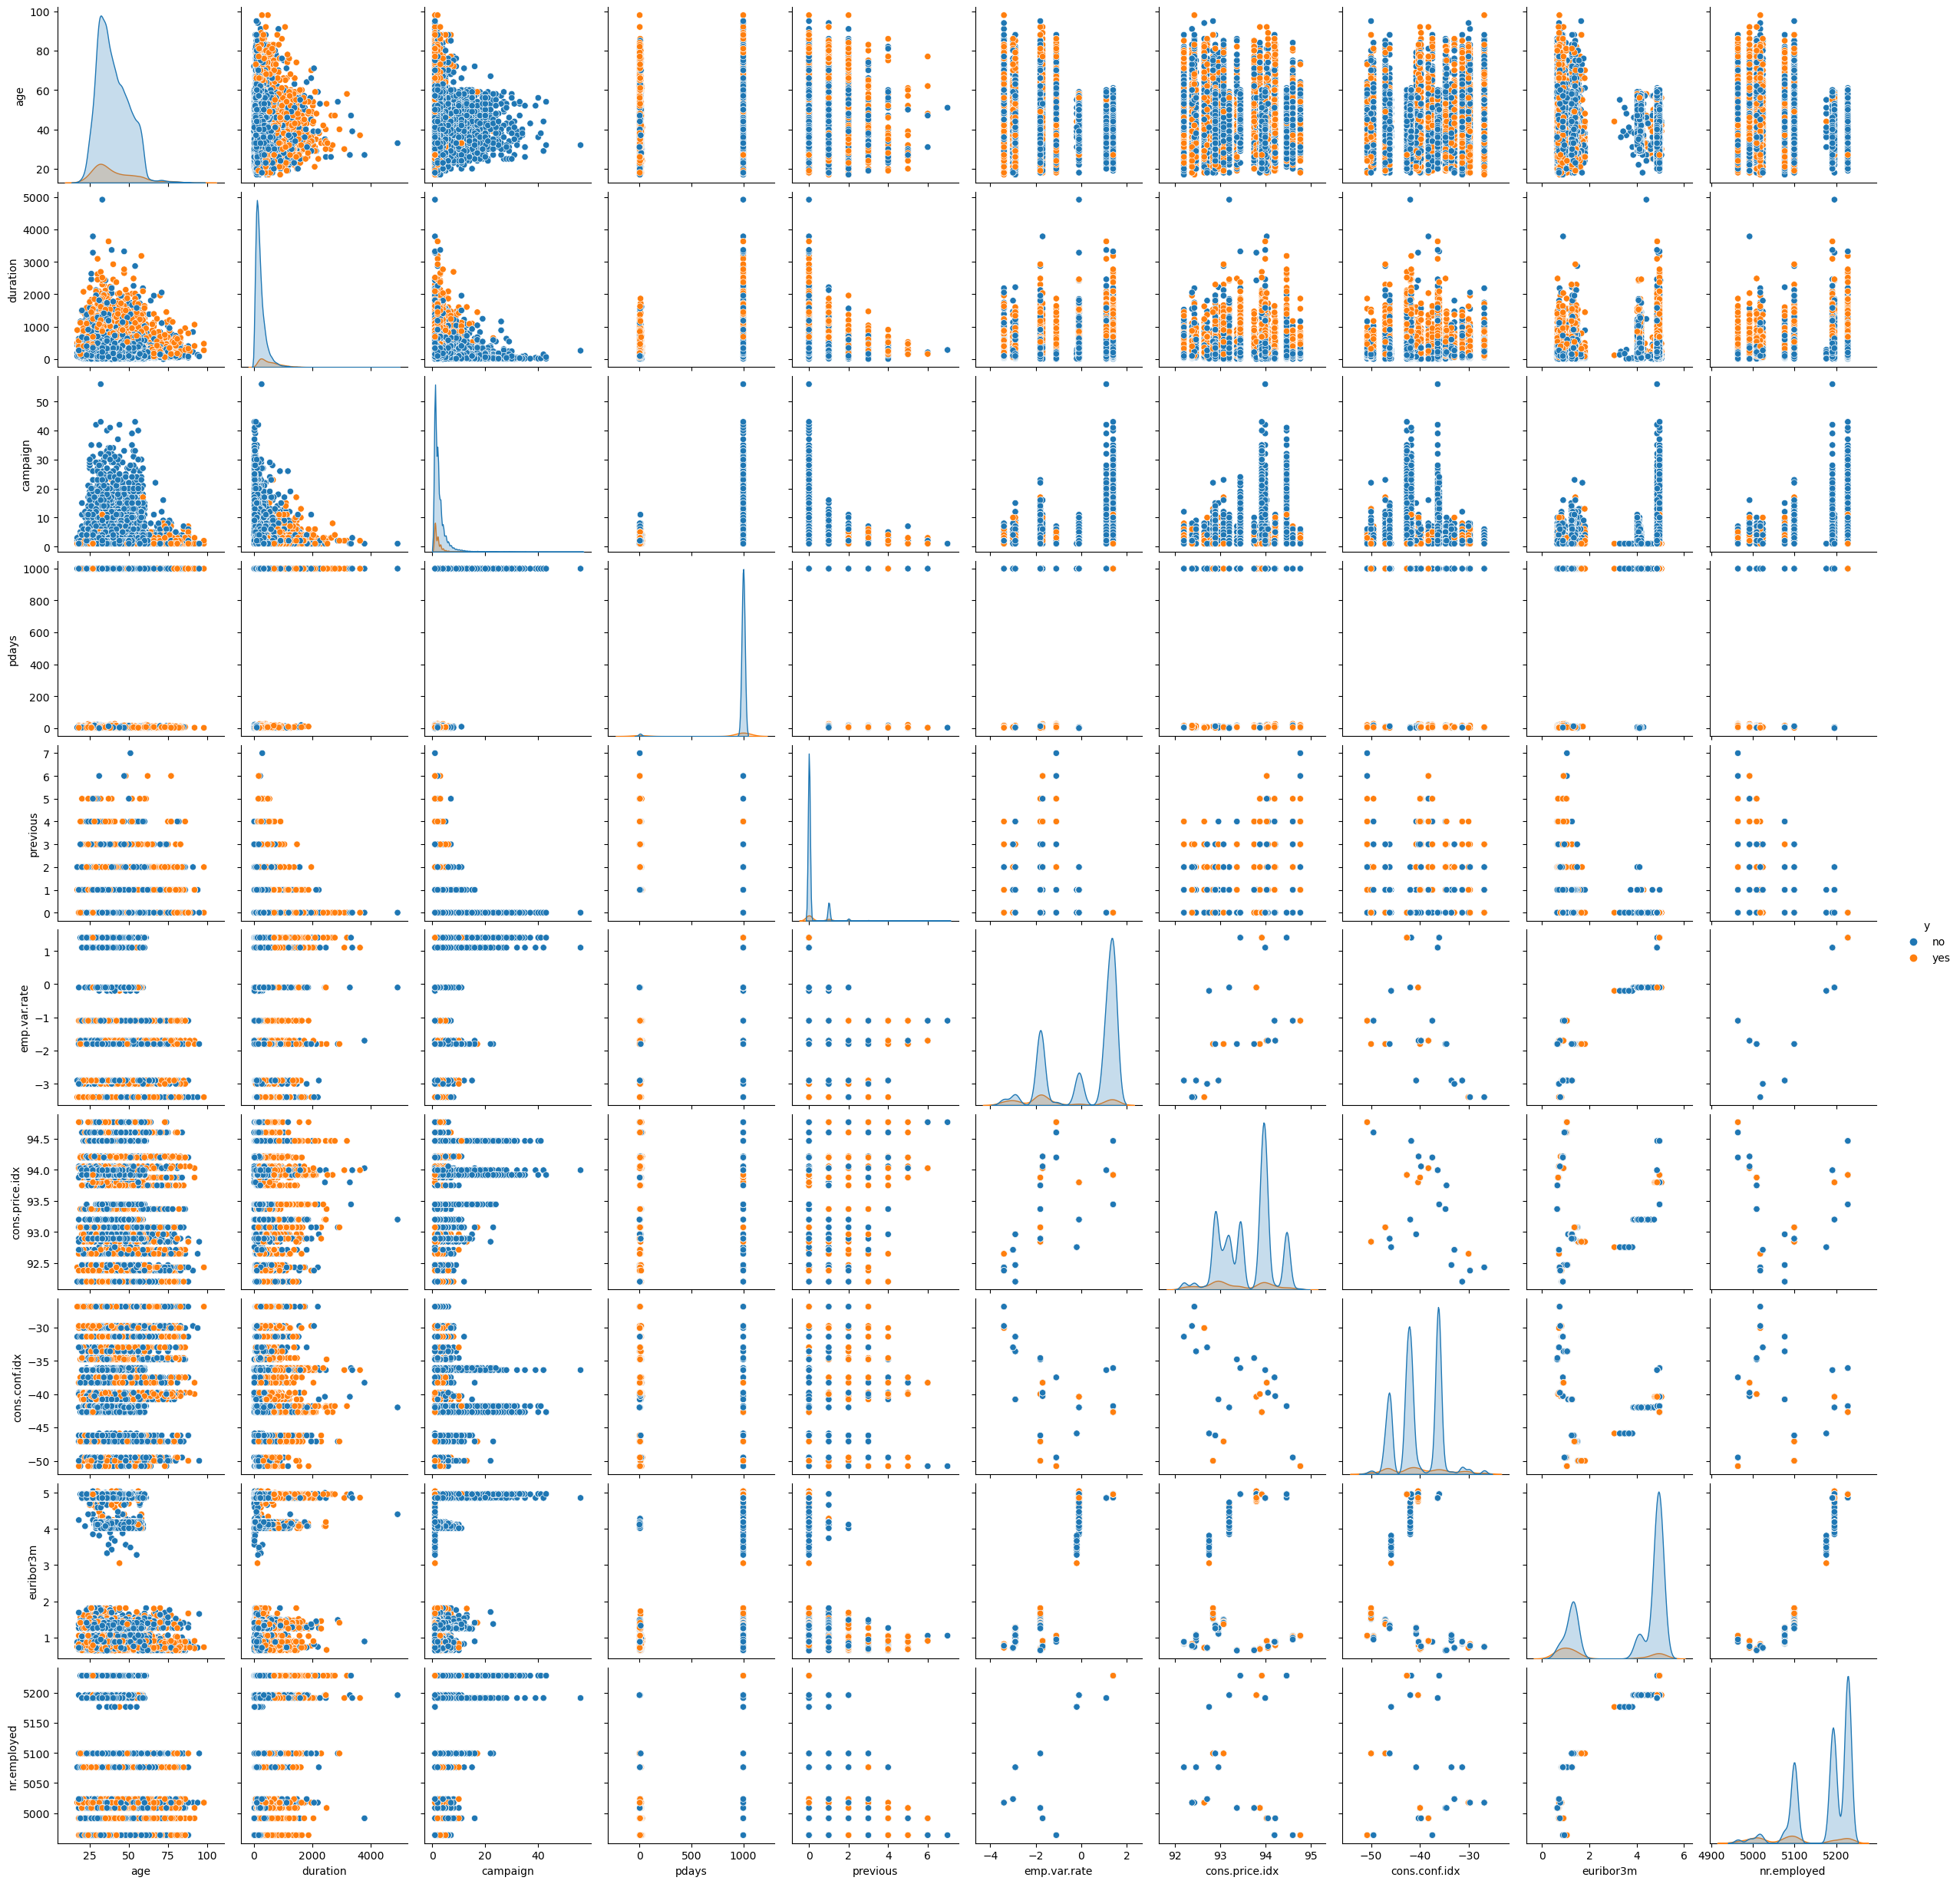

In [16]:
sns.pairplot(train_df, hue='y');

# Training 

In [80]:
training_dataset = TabularDataset.from_records(train_df)
predictor = TabularPredictor(label=label, path=model_save_path, learner_kwargs={'positive_class':'yes'}, eval_metric='recall').fit(training_dataset)

Beginning AutoGluon training ...
AutoGluon will save models to "/Users/Michael_Enudi/autogluon_models/bank_marketing_data/"
AutoGluon Version:  0.7.0
Python Version:     3.9.16
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 22.4.0: Mon Mar  6 21:00:17 PST 2023; root:xnu-8796.101.5~3/RELEASE_X86_64
Train Data Rows:    36245
Train Data Columns: 20
Label Column: y
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['no', 'yes']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = yes, class 0 = no
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5521.76 MB
	Train Data (Or

In [81]:
predictor.leaderboard();

                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       NeuralNetFastAI   0.744681       0.042739  28.396877                0.042739          28.396877            1       True         10
1   WeightedEnsemble_L2   0.744681       0.047151  30.954129                0.004412           2.557252            2       True         14
2        NeuralNetTorch   0.677305       0.029340  36.540377                0.029340          36.540377            1       True         12
3              LightGBM   0.567376       0.010603   1.100665                0.010603           1.100665            1       True          4
4         LightGBMLarge   0.549645       0.019935   1.842522                0.019935           1.842522            1       True         13
5               XGBoost   0.542553       0.015208   0.959019                0.015208           0.959019            1       True         11
6              CatBoost   0

Computing feature importance via permutation shuffling for 20 features using 5000 rows with 5 shuffle sets...
	13.97s	= Expected runtime (2.79s per shuffle set)
	8.23s	= Actual runtime (Completed 5 of 5 shuffle sets)


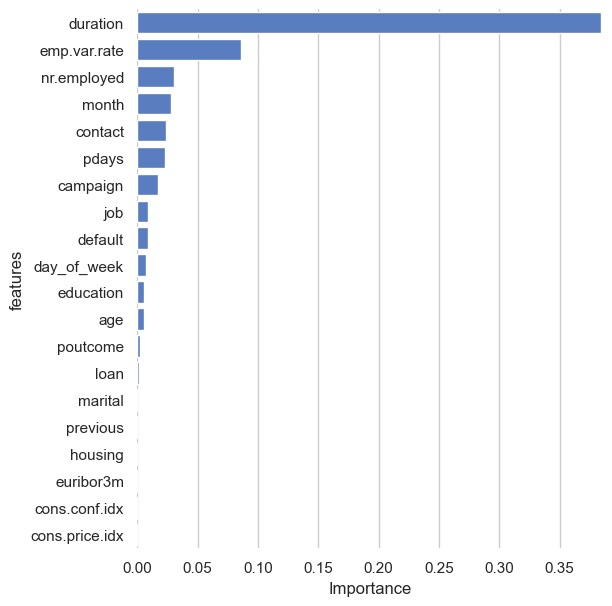

In [82]:
feature_imp = predictor.feature_importance(training_dataset)
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 7))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y=feature_imp.index, x=feature_imp.importance, label="Importance", color="b", ax=ax)

ax.set(xlim=(0, feature_imp.importance.max()+0.001), ylabel="features", xlabel="Importance")
sns.despine(left=True, bottom=True)

In [83]:
predictor.fit_summary();

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       NeuralNetFastAI   0.744681       0.042739  28.396877                0.042739          28.396877            1       True         10
1   WeightedEnsemble_L2   0.744681       0.047151  30.954129                0.004412           2.557252            2       True         14
2        NeuralNetTorch   0.677305       0.029340  36.540377                0.029340          36.540377            1       True         12
3              LightGBM   0.567376       0.010603   1.100665                0.010603           1.100665            1       True          4
4         LightGBMLarge   0.549645       0.019935   1.842522                0.019935           1.842522            1       True         13
5               XGBoost   0.542553       0.015208   0.959019                0.015208           0.959019 

/Users/Michael_Enudi/opt/anaconda3/envs/autogluon/lib/python3.9/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [84]:
predictor.evaluate(training_dataset)

Evaluation: recall on test data: 0.7386725446975263
Evaluations on test data:
{
    "recall": 0.7386725446975263,
    "accuracy": 0.9119602703821217,
    "balanced_accuracy": 0.8363159377924545,
    "mcc": 0.6095958416708127,
    "roc_auc": 0.9502596402918162,
    "f1": 0.6540171310853301,
    "precision": 0.5867704280155642
}


{'recall': 0.7386725446975263,
 'accuracy': 0.9119602703821217,
 'balanced_accuracy': 0.8363159377924545,
 'mcc': 0.6095958416708127,
 'roc_auc': 0.9502596402918162,
 'f1': 0.6540171310853301,
 'precision': 0.5867704280155642}

## Testing and evaluation

In [85]:
test_dataset = TabularDataset.from_records(test_df.drop(columns=[label], axis=1))
y_true = test_df[label]
y_pred = predictor.predict(test_dataset, model='LightGBM')
print("Accuracy score:", round(accuracy_score(y_true, y_pred),4))
print("Precision score:", round(precision_score(y_true, y_pred, pos_label='yes'),4))
print("Recall score:", round(recall_score(y_true, y_pred, pos_label='yes'),4))
print("F1 score:", round(f1_score(y_true, y_pred, pos_label='yes'),4))

Accuracy score: 0.9142
Precision score: 0.6338
Recall score: 0.5655
F1 score: 0.5977


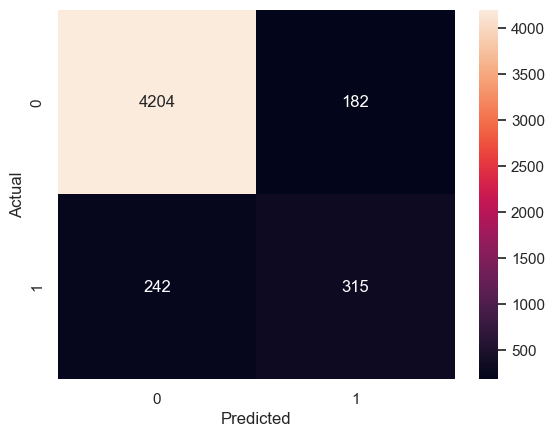

In [86]:
ax =  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted');

Computing feature importance via permutation shuffling for 20 features using 4943 rows with 5 shuffle sets...
	12.53s	= Expected runtime (2.51s per shuffle set)
	7.73s	= Actual runtime (Completed 5 of 5 shuffle sets)


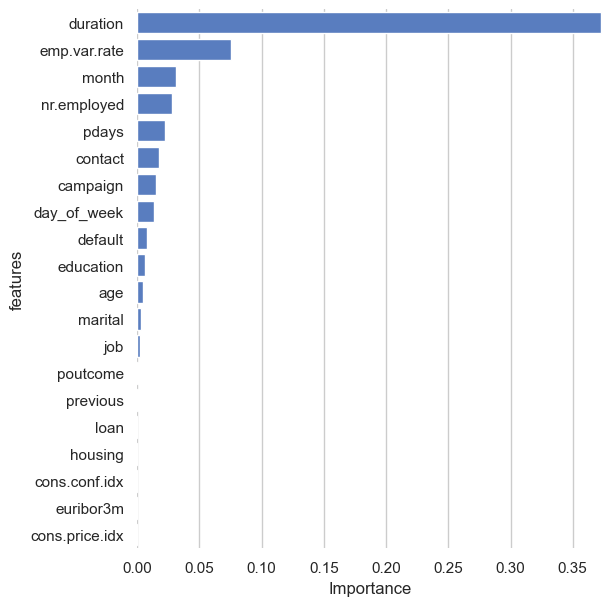

In [87]:
feature_imp = predictor.feature_importance(TabularDataset.from_records(test_df))
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 7))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(y=feature_imp.index, x=feature_imp.importance, label="Importance", color="b", ax=ax)

ax.set(xlim=(0, feature_imp.importance.max()+0.001), ylabel="features", xlabel="Importance")
sns.despine(left=True, bottom=True)